In [131]:
% matplotlib notebook

import pygrib
#import requests
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
#import datetime
#import scipy.interpolate
#import os

In [11]:
grbs = pygrib.open("1979010100.grb")

In [12]:
grbs.message

328

In [173]:
for i in range(1, 328):
    print(grbs[i])

1:Surface pressure:Pa (instant):regular_gg:surface:level 0:fcst time 6 hrs:from 197901010000
2:Total Precipitation:kg m**-2 (accum):regular_gg:surface:level 0:fcst time 0-6 hrs (accum):from 197901010000
3:Water temperature:K (instant):regular_gg:surface:level 0:fcst time 6 hrs:from 197901010000
4:Snow fall rate water equivalent:kg m**-2 s**-1 (instant):regular_gg:surface:level 0:fcst time 6 hrs:from 197901010000
5:10 metre U wind component:m s**-1 (instant):regular_gg:heightAboveGround:level 10:fcst time 6 hrs:from 197901010000
6:10 metre V wind component:m s**-1 (instant):regular_gg:heightAboveGround:level 10:fcst time 6 hrs:from 197901010000
7:2 metre temperature:K (instant):regular_gg:heightAboveGround:level 2:fcst time 6 hrs:from 197901010000
8:Specific humidity:kg kg**-1 (instant):regular_gg:heightAboveGround:level 2:fcst time 6 hrs:from 197901010000
9:U component of wind:m s**-1 (instant):regular_gg:hybrid:level 1:fcst time 6 hrs:from 197901010000
10:V component of wind:m s**-1 (

In [32]:
uVw = grbs[5]
uVw_values = uVw.values
vVw = grbs[6]
vVw_values = vVw.values

In [60]:
uVw.values[35][45]

0.025421142578125

In [53]:
uVw_values.shape

(160, 320)

In [50]:
sum = 0
for i in range(0,50):
    sum = sum + uVw_values[1][i] 
avg = sum/50
avg

-10.810203857421875

In [45]:
lat, lon = uVw.latlons()

In [59]:
lat[35][45]

49.906211835711019

In [34]:
uVw.analDate

datetime.datetime(1979, 1, 1, 0, 0)

In [35]:
uVw.name

'10 metre U wind component'

In [36]:
vVw.name

'10 metre V wind component'

In [40]:
uVw.projparams

{'a': 6367470, 'b': 6367470, 'proj': 'cyl'}

In [39]:
uVw.projparams == vVw.projparams

True

In [41]:
uVw.keys()

['parametersVersion',
 'UseEcmfConventions',
 'GRIBEX_boustrophedonic',
 'hundred',
 'globalDomain',
 'GRIBEditionNumber',
 'eps',
 'offsetSection0',
 'section0Length',
 'totalLength',
 'editionNumber',
 'WMO',
 'productionStatusOfProcessedData',
 'section1Length',
 'wrongPadding',
 'table2Version',
 'centre',
 'centreDescription',
 'generatingProcessIdentifier',
 'gridDefinition',
 'indicatorOfParameter',
 'parameterName',
 'parameterUnits',
 'indicatorOfTypeOfLevel',
 'pressureUnits',
 'typeOfLevelECMF',
 'typeOfLevel',
 'level',
 'yearOfCentury',
 'month',
 'day',
 'hour',
 'minute',
 'second',
 'unitOfTimeRange',
 'P1',
 'P2',
 'timeRangeIndicator',
 'numberIncludedInAverage',
 'numberMissingFromAveragesOrAccumulations',
 'centuryOfReferenceTimeOfData',
 'subCentre',
 'paramIdECMF',
 'paramId',
 'cfNameECMF',
 'cfName',
 'cfVarNameECMF',
 'cfVarName',
 'unitsECMF',
 'units',
 'nameECMF',
 'name',
 'decimalScaleFactor',
 'setLocalDefinition',
 'dataDate',
 'year',
 'dataTime',
 'jul

In [43]:
uVw['minimum']

-23.365203857421875

<IPython.core.display.Javascript object>


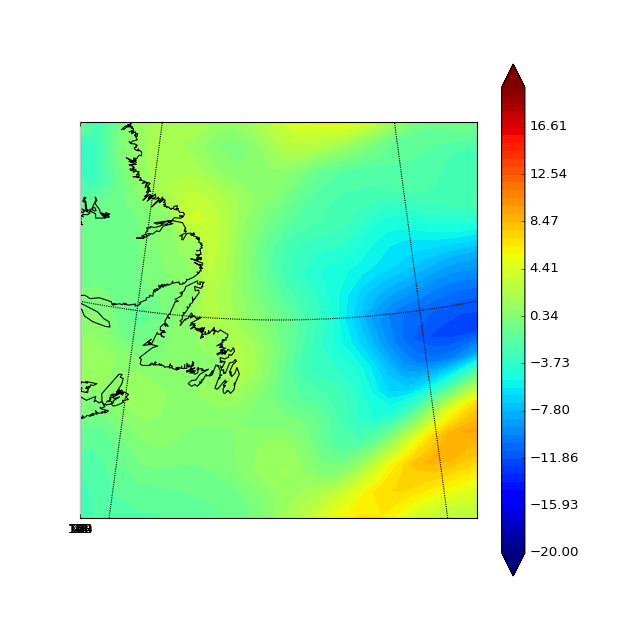

In [159]:
fig = plt.figure(figsize=(8,8))
m = Basemap(projection='lcc',lon_0=-50, lat_0=50, height= 2000e3, width=2000e3,resolution='l')
m.drawcoastlines()
#m.fillcontinents(color='coral', lake_color='aqua')
# draw parallels and meridians
m.drawparallels(np.arange(-80.,81., 10.))
m.drawmeridians(np.arange(-180.,181., 20.))
m.drawmapboundary(fill_color='aqua')

x,y = m(lon,lat)
m.contourf(x,y,uVw_values, np.linspace(-20,20,60),extend='both')
plt.colorbar()

## Part 2

In [162]:
data = pygrib.open("1979010100.grb")

In [163]:
t_uVw_vVw = np.zeros((36,3))
b = 0
for a in range(0, 36):
    t_uVw_vVw[a,0] = b*6
    b = b + 1

In [164]:
t_uVw_vVw[2]

array([ 12.,   0.,   0.])

In [165]:
prefix = "197901"
b = 0

#for i in range(0,1):
for j in range(1,10):
    if j < 10:
        j = "0" + str(j)
    else:
        j = str(j)

    for k in np.arange(0, 19, 6):
        if k < 12:
            k = "0" + str(k)
        else:
            k = str(k)
        filename = prefix + j + k + ".grb"
        data = pygrib.open('/home/evankielley/Downloads/test_gribs/197901/' + filename)
        uVw3545 = data[5].values[35][45]
        vVw3545 = data[6].values[35][45]
        data.close()
        t_uVw_vVw[b,1] = uVw3545
        t_uVw_vVw[b,2] = vVw3545
        b = b + 1

In [166]:
t_uVw_vVw

array([[  0.00000000e+00,   2.54211426e-02,  -3.94456482e+00],
       [  6.00000000e+00,  -1.35792542e+00,  -2.06533813e+00],
       [  1.20000000e+01,  -2.30885315e+00,  -1.11026001e+00],
       [  1.80000000e+01,  -3.07933044e+00,  -6.24588013e-01],
       [  2.40000000e+01,  -3.88883972e+00,   3.84735107e-01],
       [  3.00000000e+01,  -4.83653259e+00,   8.44970703e-01],
       [  3.60000000e+01,  -4.46185303e+00,   1.65917969e+00],
       [  4.20000000e+01,  -3.43611145e+00,   2.72669983e+00],
       [  4.80000000e+01,  -2.19085693e+00,   2.83206177e+00],
       [  5.40000000e+01,  -1.69250488e-01,   3.06535339e+00],
       [  6.00000000e+01,   2.78700256e+00,   1.77182007e+00],
       [  6.60000000e+01,   1.09962463e+00,  -3.90502930e-01],
       [  7.20000000e+01,  -5.75119019e-01,  -8.98788452e-01],
       [  7.80000000e+01,  -2.23651123e+00,  -1.08058167e+00],
       [  8.40000000e+01,  -3.85897827e+00,  -1.19705200e+00],
       [  9.00000000e+01,  -3.07005310e+00,  -4.0533447

<IPython.core.display.Javascript object>


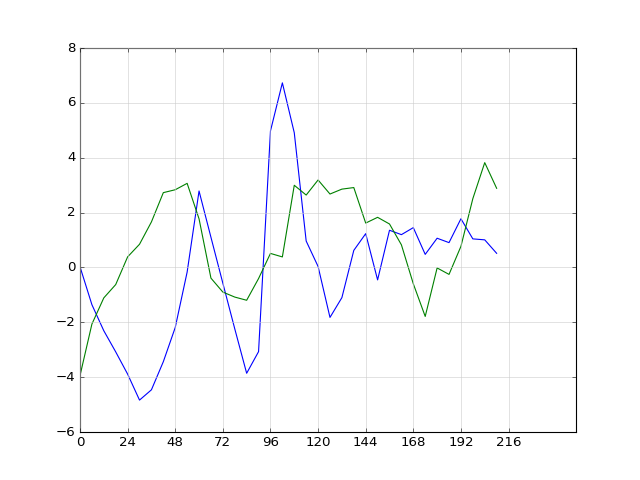

<function matplotlib.pyplot.show>

In [172]:
A = t_uVw_vVw
t,U,V = A.T 

fig=plt.figure()
ax = fig.add_subplot(111)
ax.plot(t,U)
ax.plot(t,V)
plt.xticks(np.arange(0, 217, 24))


#plt.plot(t,U) 
#plt.plot(t,V)
#plt.xticks(np.arange(0, 210, 24))
plt.grid(b=True, which='major', color='0.8', linestyle='-')
plt.show

In [137]:
filename

'1979010918.grb'

In [ ]:
import random
#random.gauss(0.07619,0.02)
random.gauss(0, 0.02)

In [ ]:
import requests
url = "https://rda.ucar.edu/datasets/ds625.0/index.html#sfol-wl-/data/ds625.0?g=14/197901_0110.fcst_mdl.subc60.tar"
r = requests.get(url, stream=True)

In [ ]:
print(r.headers)

In [ ]:
filename = "my_file.tar"
with open(filename, 'wb') as f:
    f.write(r.content)

In [ ]:
import tarfile    

# Open tarfile
tar = tarfile.open(mode="r:gz", fileobj = f)

# Iterate over every member
for member in tar.getnames():
    # Print contents of every file
    print(tar.extractfile(member).read())

In [ ]:
# fetch.py
from io import StringIO
import gzip
#import requests
# Called a 'tar' file but actually a gzip file. @#$%!!!
#url = "http://example.com/data.tar.gz"
response = requests.get(url)

results = gzip.GzipFile(fileobj=StringIO(response.content))